# Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

#### SKlearn ####
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df_customer = pd.read_csv('/content/drive/MyDrive/Data Mining/HW4/Wholesale customers data.csv')
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
z_score = zscore(df_customer[list(df_customer.columns)])
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_customer = df_customer[filtered_entries]
df_customer

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df_customer)
X.shape

(414, 8)

# T-distributed Stochastic Neighbor Embedding (tSNE)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


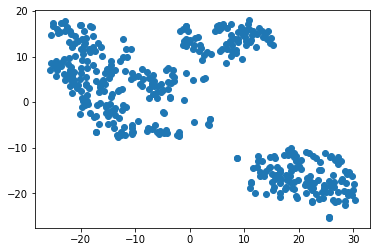

In [6]:
t_sne = TSNE(n_components=2)
S_t_sne = t_sne.fit_transform(X)
plt.scatter(S_t_sne[:, 0], S_t_sne[:, 1])


# DBSCAN

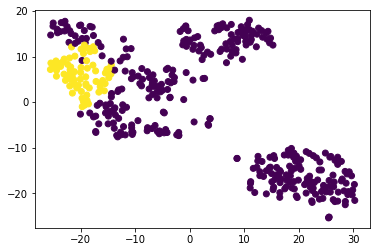

In [7]:
clustering = DBSCAN().fit(X)
labels = clustering.labels_
plt.scatter(S_t_sne[:, 0], S_t_sne[:, 1], c=labels)

Text(0, 0.5, 'Silhouette Average')

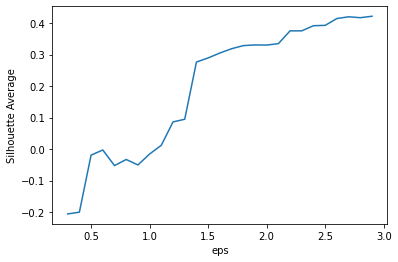

In [51]:
silhouette_avg_vals = []
eps_ls = np.arange(0.3, 3, 0.1)
for i, eps in enumerate(eps_ls):
  clustering = DBSCAN(eps=eps).fit(X)
  labels = clustering.labels_
  silhouette_avg = silhouette_score(X, labels)
  silhouette_avg_vals.append(silhouette_avg)

plt.plot(eps_ls, silhouette_avg_vals)
plt.xlabel("eps")
plt.ylabel("Silhouette Average")

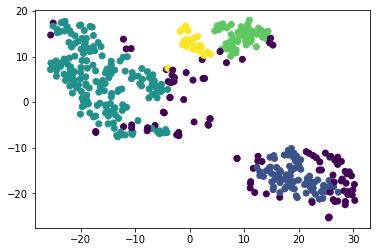

In [52]:
clustering = DBSCAN(eps=1.3).fit(X)
labels = clustering.labels_
plt.scatter(S_t_sne[:, 0], S_t_sne[:, 1], c=labels)